# **IMPORTING LIBRARIES**

In [1]:
import pandas as pd, re
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize
import warnings
warnings.filterwarnings('ignore')

In [2]:
nltk.download('punkt')
nltk.download()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> x

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

# **DATASET**

In [4]:
info_df=pd.read_csv('gender-classifier.csv',encoding='latin-1')

# DATA ANALYSIS

In [5]:
info_df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [6]:
info_df=info_df[[ 'gender', 'gender:confidence', 'description',
        'link_color', 'name', 'sidebar_color', 'text', 'tweet_count']]

In [7]:
info_df

,gender,gender:confidence,description,link_color,name,sidebar_color,text,tweet_count
0,male,1.0000,i sing my own rhythm.,08C2C2,sheezy0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964
1,male,1.0000,I'm the author of novels filled with family dr...,0084B4,DavdBurnett,C0DEED,ÛÏIt felt like they were my friends and I was...,7471
2,male,0.6625,louis whining and squealing and all,ABB8C2,lwtprettylaugh,C0DEED,i absolutely adore when louis starts the songs...,5617
3,male,1.0000,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",0084B4,douggarland,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693
4,female,1.0000,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,3B94D9,WilfordGemma,0,Watching Neighbours on Sky+ catching up with t...,31462
...,...,...,...,...,...,...,...,...
20045,female,1.0000,(rp),0084B4,capuletrosa,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",783
20046,male,1.0000,"Whatever you like, it's not a problem at all. ...",CFB929,BenNight41,0,Greg Hardy you a good player and all but don't...,13523
20047,male,1.0000,#TeamBarcelona ..You look lost so you should f...,0084B4,realuzzyfluxz,C0DEED,You can miss people and still never want to se...,26419
20048,female,0.8489,Anti-statist; I homeschool my kids. Aspiring t...,9266CC,argumatronic,0,@bitemyapp i had noticed your tendency to pee ...,56073


In [8]:
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             19953 non-null  object 
 1   gender:confidence  20024 non-null  float64
 2   description        16306 non-null  object 
 3   link_color         20050 non-null  object 
 4   name               20050 non-null  object 
 5   sidebar_color      20050 non-null  object 
 6   text               20050 non-null  object 
 7   tweet_count        20050 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 1.2+ MB


In [9]:
info_df = info_df[info_df['gender'].notna()]

In [10]:
info_df.reset_index(drop=True,inplace=True)
info_df


,gender,gender:confidence,description,link_color,name,sidebar_color,text,tweet_count
0,male,1.0000,i sing my own rhythm.,08C2C2,sheezy0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964
1,male,1.0000,I'm the author of novels filled with family dr...,0084B4,DavdBurnett,C0DEED,ÛÏIt felt like they were my friends and I was...,7471
2,male,0.6625,louis whining and squealing and all,ABB8C2,lwtprettylaugh,C0DEED,i absolutely adore when louis starts the songs...,5617
3,male,1.0000,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",0084B4,douggarland,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693
4,female,1.0000,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,3B94D9,WilfordGemma,0,Watching Neighbours on Sky+ catching up with t...,31462
...,...,...,...,...,...,...,...,...
19948,female,1.0000,(rp),0084B4,capuletrosa,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",783
19949,male,1.0000,"Whatever you like, it's not a problem at all. ...",CFB929,BenNight41,0,Greg Hardy you a good player and all but don't...,13523
19950,male,1.0000,#TeamBarcelona ..You look lost so you should f...,0084B4,realuzzyfluxz,C0DEED,You can miss people and still never want to se...,26419
19951,female,0.8489,Anti-statist; I homeschool my kids. Aspiring t...,9266CC,argumatronic,0,@bitemyapp i had noticed your tendency to pee ...,56073


<class 'pandas.core.series.Series'>
5942 6700 6194 1117


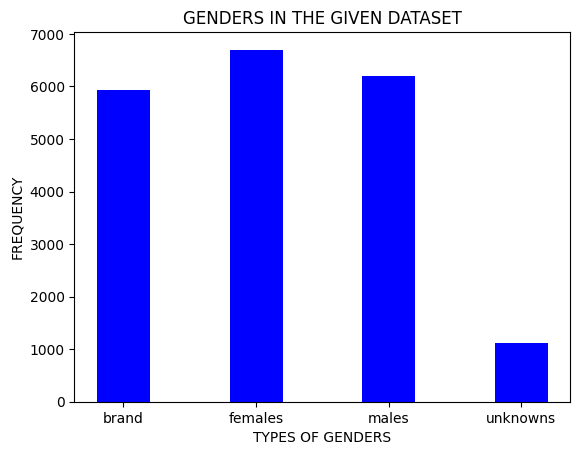

In [11]:
#Number of males and females
import matplotlib.pyplot as plt
info = info_df.groupby('gender').size()
print(type(info))
brand = info[0]
females = info[1]
males = info[2]
unknowns = info[3]

print(brand,females,males,unknowns)

genderData = {'brand':brand,
             'females':females,
             'males':males,
             'unknowns':unknowns}

types = list(genderData.keys())
count = list(genderData.values())

plt.bar(types,count,color='blue',width=0.4)
plt.xlabel("TYPES OF GENDERS")
plt.ylabel("FREQUENCY")
plt.title("GENDERS IN THE GIVEN DATASET")
plt.show()

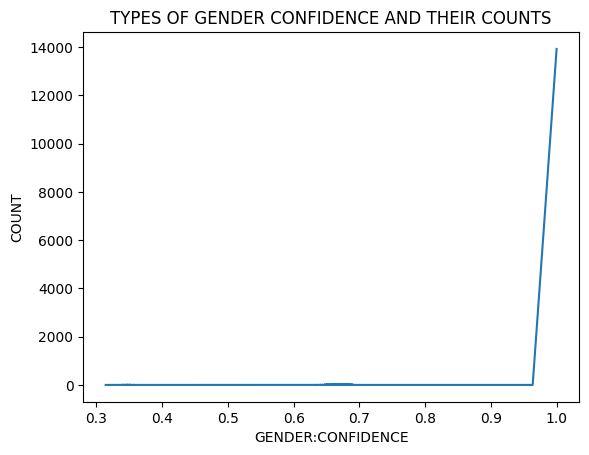

In [12]:
genderConfidenceCount = info_df.groupby('gender:confidence').size()
gcData = genderConfidenceCount.to_dict()
gcData
x = list(gcData.keys())
y = list(gcData.values())
plt.plot(x, y)
plt.xlabel('GENDER:CONFIDENCE')
plt.ylabel('COUNT')
plt.title('TYPES OF GENDER CONFIDENCE AND THEIR COUNTS')
plt.show()

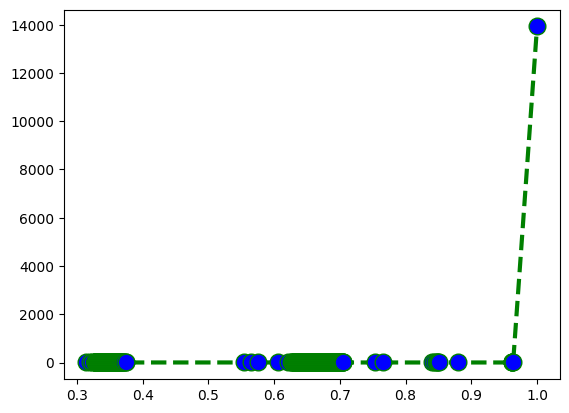

In [13]:
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)

In [14]:
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19953 entries, 0 to 19952
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             19953 non-null  object 
 1   gender:confidence  19953 non-null  float64
 2   description        16224 non-null  object 
 3   link_color         19953 non-null  object 
 4   name               19953 non-null  object 
 5   sidebar_color      19953 non-null  object 
 6   text               19953 non-null  object 
 7   tweet_count        19953 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 1.2+ MB


In [15]:
info_df=info_df[info_df['gender:confidence']>0.8]
info_df

,gender,gender:confidence,description,link_color,name,sidebar_color,text,tweet_count
0,male,1.0000,i sing my own rhythm.,08C2C2,sheezy0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964
1,male,1.0000,I'm the author of novels filled with family dr...,0084B4,DavdBurnett,C0DEED,ÛÏIt felt like they were my friends and I was...,7471
3,male,1.0000,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",0084B4,douggarland,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693
4,female,1.0000,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,3B94D9,WilfordGemma,0,Watching Neighbours on Sky+ catching up with t...,31462
5,female,1.0000,you don't know me.,F5ABB5,monroevicious,0,"Ive seen people on the train with lamps, chair...",20036
...,...,...,...,...,...,...,...,...
19948,female,1.0000,(rp),0084B4,capuletrosa,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",783
19949,male,1.0000,"Whatever you like, it's not a problem at all. ...",CFB929,BenNight41,0,Greg Hardy you a good player and all but don't...,13523
19950,male,1.0000,#TeamBarcelona ..You look lost so you should f...,0084B4,realuzzyfluxz,C0DEED,You can miss people and still never want to se...,26419
19951,female,0.8489,Anti-statist; I homeschool my kids. Aspiring t...,9266CC,argumatronic,0,@bitemyapp i had noticed your tendency to pee ...,56073


In [16]:
info_df.reset_index(drop=True,inplace=True)
info_df


,gender,gender:confidence,description,link_color,name,sidebar_color,text,tweet_count
0,male,1.0000,i sing my own rhythm.,08C2C2,sheezy0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964
1,male,1.0000,I'm the author of novels filled with family dr...,0084B4,DavdBurnett,C0DEED,ÛÏIt felt like they were my friends and I was...,7471
2,male,1.0000,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",0084B4,douggarland,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693
3,female,1.0000,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,3B94D9,WilfordGemma,0,Watching Neighbours on Sky+ catching up with t...,31462
4,female,1.0000,you don't know me.,F5ABB5,monroevicious,0,"Ive seen people on the train with lamps, chair...",20036
...,...,...,...,...,...,...,...,...
13934,female,1.0000,(rp),0084B4,capuletrosa,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",783
13935,male,1.0000,"Whatever you like, it's not a problem at all. ...",CFB929,BenNight41,0,Greg Hardy you a good player and all but don't...,13523
13936,male,1.0000,#TeamBarcelona ..You look lost so you should f...,0084B4,realuzzyfluxz,C0DEED,You can miss people and still never want to se...,26419
13937,female,0.8489,Anti-statist; I homeschool my kids. Aspiring t...,9266CC,argumatronic,0,@bitemyapp i had noticed your tendency to pee ...,56073


In [17]:
info_df=info_df[info_df['gender']!='unknown']

In [18]:
info_df.reset_index(drop=True, inplace=True)

In [20]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
clean_texts = []
for i in range(info_df.shape[0]):
    current_message = info_df['text'].values[i]
    tokenized_words = word_tokenize(current_message)
    clean_message = ''
    for word in tokenized_words:
        if word not in stop_words and not word.startswith('@'):
            try:
                word = int(word)
            except:
                clean_message += word + ' '

    clean_texts.append(clean_message)

len(clean_texts)

13817

In [22]:
info_df['clean_texts']=clean_texts
info_df

,gender,gender:confidence,description,link_color,name,sidebar_color,text,tweet_count,clean_texts
0,male,1.0000,i sing my own rhythm.,08C2C2,sheezy0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964,Robbie E Responds To Critics After Win Against...
1,male,1.0000,I'm the author of novels filled with family dr...,0084B4,DavdBurnett,C0DEED,ÛÏIt felt like they were my friends and I was...,7471,ÛÏIt felt like friends I living story themÛ...
2,male,1.0000,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",0084B4,douggarland,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693,Hi JordanSpieth - Looking url - use IFTTT ? ! ...
3,female,1.0000,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,3B94D9,WilfordGemma,0,Watching Neighbours on Sky+ catching up with t...,31462,Watching Neighbours Sky+ catching Neighbs ! ! ...
4,female,1.0000,you don't know me.,F5ABB5,monroevicious,0,"Ive seen people on the train with lamps, chair...",20036,"Ive seen people train lamps , chairs , tvs etc..."
...,...,...,...,...,...,...,...,...,...
13812,female,1.0000,(rp),0084B4,capuletrosa,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",783,"lookupondeath ... Fine , I 'll drink tea . I l..."
13813,male,1.0000,"Whatever you like, it's not a problem at all. ...",CFB929,BenNight41,0,Greg Hardy you a good player and all but don't...,13523,Greg Hardy good player n't get face Dez Bryant...
13814,male,1.0000,#TeamBarcelona ..You look lost so you should f...,0084B4,realuzzyfluxz,C0DEED,You can miss people and still never want to se...,26419,You miss people still never want see
13815,female,0.8489,Anti-statist; I homeschool my kids. Aspiring t...,9266CC,argumatronic,0,@bitemyapp i had noticed your tendency to pee ...,56073,"bitemyapp noticed tendency pee carpet , n't wa..."


Question 1:
----------------------
Male and Female top used words.
-------

In [23]:
female_tweets = info_df[info_df['gender'] == 'female']
print('Female Tweets:')
print(female_tweets['text'].head())

print('\nMale Tweets:')
male_tweets = info_df[info_df['gender'] == 'male']
print(male_tweets['text'].head())


def get_clean_tweet(text):
    url_regex = r'(https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*))'
    twitter_handle_regex = r'(@[a-zA-Z_]+){1,15}'
    hashtag_regex = r'#[a-z-A-Z_\']+'
    clean_text = re.sub(url_regex, '', text)
    clean_text = re.sub(twitter_handle_regex, '', clean_text)
    clean_text = re.sub(hashtag_regex, '', clean_text)
    word_list = re.findall(r"[A-Za-z']+", clean_text)
    return ' '.join(word_list)

def get_word_count(tweets):
    words = dict()
    stop_words = stopwords.words("english")
    for tweet in enumerate(tweets):
        word_list = re.findall(r"[A-Za-z']+", tweet[1])
        for word in word_list:
            word = word.lower()
            if word in stop_words:
                continue
            words[word] = words.get(word, 0) + 1
    return words

female_tweets['clean_text'] = female_tweets['text'].apply(lambda tweet: get_clean_tweet(tweet))
male_tweets['clean_text'] = male_tweets['text'].apply(lambda tweet: get_clean_tweet(tweet))

female_words = get_word_count(female_tweets['clean_text'])
male_words = get_word_count(male_tweets['clean_text'])


sorted_female = {k: v for k, v in sorted(female_words.items(), key=lambda item: item[1], reverse=True)}
sorted_male = {k: v for k, v in sorted(male_words.items(), key=lambda item: item[1], reverse=True)}
print('Female top used words:')
for i in list(sorted_female.items())[:5]:
    print('{}: {}'.format(i[0], i[1]))
print('\nMale top used words:')
for i in list(sorted_male.items())[:5]:
    print('{}: {}'.format(i[0], i[1]))

Female Tweets:
3     Watching Neighbours on Sky+ catching up with t...
4     Ive seen people on the train with lamps, chair...
7     @_Aphmau_ the pic defines all mcd fangirls/fan...
8     @Evielady just how lovely is the tree this yea...
11    https://t.co/EROGWTFTYo It's a glow of satisfa...
Name: text, dtype: object

Male Tweets:
0     Robbie E Responds To Critics After Win Against...
1     ÛÏIt felt like they were my friends and I was...
2     Hi @JordanSpieth - Looking at the url - do you...
6     Gala Bingo clubs bought for å£241m: The UK's l...
13    @coolyazzy94 Ditto - I'm still learning the fa...
Name: text, dtype: object
Female top used words:
i'm: 438
like: 358
get: 303
one: 262
day: 253

Male top used words:
like: 271
get: 258
i'm: 236
one: 193
time: 181


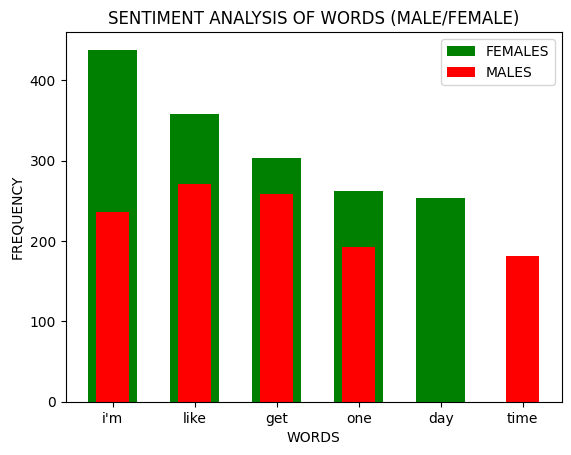

In [36]:
xF = list(sorted_female.keys())[:5]
yF = list(sorted_female.values())[:5]
xM = list(sorted_male.keys())[:5]
yM = list(sorted_male.values())[:5]
p1 = plt.bar(xF,yF,color='GREEN',width=0.6)
p2 = plt.bar(xM,yM,color='red',width=0.4)
plt.xlabel("WORDS")
plt.ylabel("FREQUENCY")
plt.title("SENTIMENT ANALYSIS OF WORDS (MALE/FEMALE)")
plt.legend((p1[0], p2[0]), ('FEMALES', 'MALES'))
plt.show()

Question 2:
------
Is the gender male or female?
-------------


Method 1: USING RANDOM FOREST CLASSIFICATION
-----------

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
cv = CountVectorizer()
X = info_df['clean_texts']
Y = info_df['gender']
X = cv.fit_transform(X)
X_train,X_test, y_train, y_test = train_test_split(X,info_df['gender'])

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rfClassifier = RandomForestClassifier(n_estimators=100)

In [28]:
rfClassifier.fit(X_train,y_train)

RandomForestClassifier()

In [29]:
y_pred=rfClassifier.predict(X_test)

In [30]:
from sklearn import metrics

In [31]:
accuracy = metrics.accuracy_score(y_test, y_pred)

In [32]:
accuracy

0.561794500723589

Method 2: Using Naive Bayes
----------

Is the gender male or female?

# NAIVE BAYES

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
cv = CountVectorizer()
sparse_data = cv.fit_transform(info_df['clean_texts'])

In [40]:
X= sparse_data

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(sparse_data, info_df['gender'])

In [59]:
from sklearn.naive_bayes import MultinomialNB

Attempt-1:

In [60]:
info_df['text+description+name']=info_df['clean_texts'].astype(str)+' '+ info_df['description'].astype(str)+' '+info_df['name'].astype(str)

In [61]:
sparse_data3 = cv.fit_transform(info_df['text+description+name'])

In [62]:
X_train,X_test, y_train, y_test = train_test_split(sparse_data3, info_df['gender'])

In [63]:
clf.fit(X_train, y_train)

MultinomialNB()

In [64]:
y_predicted = clf.predict(X_test)

In [65]:
accuracy_score(y_test, y_predicted)

0.6821997105643994

Accuracy for Naive Bayes: 69.6%

Method 3: Using KNN
-------------

Is the gender male or female?

In [66]:
import math
def levenshtein(seq1, seq2):
    s1=seq1
    s2=seq2
#     if(!pd.isnull(seq1)):
#         s1 = seq1
#     if(!pd.isnull(seq2)):
#         s2 = seq2

#     print(s1,s2)
    size_x = len(s1) + 1
    size_y = len(s2) + 1
    matrix = np.zeros ((size_x, size_y))
    for x in range(size_x):
        matrix [x, 0] = x
    for y in range(size_y):
        matrix [0, y] = y

    for x in range(1, size_x):
        for y in range(1, size_y):
            if seq1[x-1] == seq2[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
#     print (matrix)
    return (matrix[size_x - 1, size_y - 1])

#Euclidean distance for numeric values
def get_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
#         print(row1[i],row2[i])
        if(isinstance(row1[i], int) or isinstance(row1[i], float)):
            distance += (row1[i] - row2[i])**2
        elif(isinstance(row1[i],str)):
            if(pd.isnull(row2[i])):
                distance += levenshtein(row1[i]," ")
            else:
                distance += levenshtein(row1[i],row2[i])
#     print(sqrt(distance))
    return distance

# Utility function for sorting
def getDistanceFromTuple(ele):
    return ele[1]


def KNNAlgorithmPredictor(testRow,trainDataSet):
#     Get input
#     clean_texts = input("Clean text")
#     description = input("Description")
#     gender_confidence = (int)(input("Gender confidence"))
#     link_color = input("Link colour")
#     name = input("Name")
#     sidebar_color = input("Sidebar color")
#     text = input("text")
#     textDescription = clean_texts+description
#     textDescriptionName = clean_texts+description+name
#     tweet_count = (int)(input("tweet count"))

#     Make the data in form that it can be compared
#     tweetCount = (float)(tweet_count)
#     genderConfidence = (float)(gender_confidence)
#     testingData = {
#         'gender':'',
#         'gender:confidence':genderConfidence,
#         'description':description,
#         'link_color':link_color,
#         'name':name,
#         'sidebar_color':sidebar_color,
#         'text':text,
#         'tweet_count':tweetCount,
#         'clean_texts':clean_texts,
#         'text+description':textDescription,
#         'text+description+name':textDescriptionName
#     }
# #     print(testingData)
#     toBePredictedRow = pd.Series(testingData)

#     Find the distances between the test row we formed and other rows in the dataset
    print("train set size : ",len(trainDataSet))
    distances = list()
    j = 0
    for i in range(1,len(trainDataSet)):
        distances.append((i-1,get_distance(testRow,trainDataSet.iloc[i])))
        print(distances[j])
        j+=1

#     Sort the distances to get the least at the top
    distances.sort(key = getDistanceFromTuple)

    # Now taking √n as number of neighbours
    n_neighbors = (int)(math.sqrt(len(info_df)))
    nearestNeighbors = []
    for i in range(0,n_neighbors):
        nearestNeighbors.append(distances[i])


#     And finally Count which gender comes most number of times and assign it to the prediction
    ans = "brand"
    male = 0
    female = 0
    brand = 0

    for i in nearestNeighbors:
        index = i[0]
        df = info_df.loc[index]['gender']
    #     print(df)
        if(df=='male'):
            male+=1
        elif(df=='female'):
            female+=1
        elif(df=='brand'):
            brand+=1

    gender = []
    gender.append(('male',male))
    gender.append(('female',female))
    gender.append(('brand',brand))
    gender.sort(reverse=True,key=getDistanceFromTuple)
    ans = gender[0][0]

#     if(male > female):
#         ans = ans.replace(ans,'male')
#     else:
#         ans = ans.replace(ans,'female')

#     And then return the answer
    return ans

In [67]:
# KNNAlgorithmPredictor()

In [68]:
# To find the accuracy of the self-made algorithm
testSet = pd.DataFrame()
trainSet = pd.DataFrame()
forChecking = []
# # Splitting the dataset into 80% and 20%
# # 80% of dataset - Training and 20% of remaining dataset - Testset

trainSize = (int)(0.4*len(info_df))
for i in range(0,trainSize):
    trainData = {
        'gender':info_df.iloc[i]['gender'],
        'gender:confidence':info_df.iloc[i]['gender:confidence'],
        'description':info_df.iloc[i]['description'],
        'link_color':info_df.iloc[i]['link_color'],
        'name':info_df.iloc[i]['name'],
        'sidebar_color':info_df.iloc[i]['sidebar_color'],
        'text':info_df.iloc[i]['text'],
        'tweet_count':info_df.iloc[i]['tweet_count'],
        'clean_texts':info_df.iloc[i]['clean_texts'],
        'text+description':info_df.iloc[i]['text+description'],
        'text+description+name':info_df.iloc[i]['text+description+name']
    }
    trainSet = trainSet.append(trainData,ignore_index=True)

for i in range(trainSize,(trainSize+50)+1):
    forChecking.append(info_df.iloc[i]['gender'])
    testData = {
        'gender':'',
        'gender:confidence':info_df.iloc[i]['gender:confidence'],
        'description':info_df.iloc[i]['description'],
        'link_color':info_df.iloc[i]['link_color'],
        'name':info_df.iloc[i]['name'],
        'sidebar_color':info_df.iloc[i]['sidebar_color'],
        'text':info_df.iloc[i]['text'],
        'tweet_count':info_df.iloc[i]['tweet_count'],
        'clean_texts':info_df.iloc[i]['clean_texts'],
        'text+description':info_df.iloc[i]['text+description'],
        'text+description+name':info_df.iloc[i]['text+description+name']
    }
    testSet = testSet.append(testData,ignore_index=True)

In [69]:
# Starting the prediction
# print(testSet.iloc[0])
score = 0
#testSet.iloc[7]
for i in range(len(testSet)-10,len(testSet)):
    prediction = KNNAlgorithmPredictor(testSet.iloc[i],trainSet)
    print(prediction, forChecking[i])
    if(prediction==forChecking[i]):
        score+=1
    print(score)

print(score/len(testSet))

train set size :  5526
(0, 468.0)
(1, 561.0)
(2, 526.0)
(3, 414.0)
(4, 403.0)
(5, 458.0)
(6, 397.0)
(7, 470.0)
(8, 479.0)
(9, 581.0)
(10, 442.0)
(11, 417.0)
(12, 436.0)
(13, 407.0)
(14, 425.0)
(15, 386.0)
(16, 419.0)
(17, 446.0)
(18, 426.0)
(19, 399.0)
(20, 389.0)
(21, 480.0)
(22, 432.0)
(23, 440.0)
(24, 477.0)
(25, 533.0)
(26, 389.0)
(27, 539.0)
(28, 396.0)
(29, 398.0)
(30, 446.0)
(31, 619.0)
(32, 473.0)
(33, 515.0)
(34, 445.0)
(35, 397.0)
(36, 409.0)
(37, 384.0)
(38, 428.0)
(39, 474.0)
(40, 374.0)
(41, 407.0)
(42, 536.0)
(43, 514.0)
(44, 411.0)
(45, 457.0)
(46, 411.0)
(47, 380.0)
(48, 463.0)
(49, 411.0)
(50, 556.0)
(51, 402.0)
(52, 410.0)
(53, 554.0)
(54, 443.0)
(55, 426.0)
(56, 375.0)
(57, 409.0)
(58, 425.0)
(59, 395.0)
(60, 393.0)
(61, 451.0)
(62, 583.0)
(63, 482.0)
(64, 480.0)
(65, 476.0)
(66, 444.0)
(67, 530.0)
(68, 541.0)
(69, 492.0)
(70, 381.0)
(71, 393.0)
(72, 441.0)
(73, 535.0)
(74, 576.0)
(75, 566.0)
(76, 423.0)
(77, 528.0)
(78, 455.0)
(79, 398.0)
(80, 484.0)
(81, 399.0)
(82

KeyboardInterrupt: ignored

In [ ]:
print('Accuracy : ',(score/10)*100)